In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [2]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [7]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [43]:
x=df.drop('Drug',axis=1)
y=df['Drug']

# Apply one-hot encoding to categorical features
x = pd.get_dummies(x, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)

In [44]:
x=np.array(x)
y=np.array(y).ravel()

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
x_train

array([[32, 10.84, False, True, False, True],
       [52, 9.894, True, False, True, False],
       [39, 9.709, False, False, True, True],
       [33, 33.486, False, True, False, False],
       [34, 22.456, True, False, True, False],
       [56, 11.567, False, True, False, False],
       [45, 17.951, True, True, False, False],
       [32, 25.974, False, False, False, True],
       [74, 15.436, True, False, False, True],
       [51, 13.597, False, False, True, False],
       [20, 9.281, False, False, True, True],
       [41, 18.739, False, True, False, True],
       [22, 8.607, False, False, True, False],
       [66, 16.347, True, False, False, False],
       [40, 10.103, False, False, True, False],
       [41, 22.905, False, False, True, True],
       [49, 6.269, True, False, False, True],
       [20, 35.639, True, False, False, True],
       [39, 17.225, False, False, True, True],
       [58, 38.247, False, True, False, False],
       [20, 11.262, False, False, False, False],
       [5

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


param_grid = {
    'n_neighbors': np.arange(1, 10)
}


grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [54]:
print("Best k value: ", grid_search.best_params_['n_neighbors'])
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best k value:  9
Best cross-validation score: 0.69


In [55]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [56]:
print(y_pred)

['drugX' 'drugX' 'drugX' 'drugB' 'DrugY' 'DrugY' 'DrugY' 'drugA' 'drugX'
 'drugX' 'drugA' 'drugX' 'DrugY' 'drugX' 'drugB' 'DrugY' 'drugX' 'drugB'
 'drugX' 'DrugY' 'drugX' 'drugB' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugX'
 'drugX' 'DrugY' 'drugX' 'DrugY' 'drugX' 'drugX' 'DrugY' 'drugA' 'DrugY'
 'DrugY' 'drugX' 'DrugY' 'drugX']


In [60]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Evaluate the predictions from the best estimator
accuracy_best = accuracy_score(y_test, y_pred)
f1_best = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy of the best model: {accuracy_best:.2f}")
print(f"Weighted F1 Score of the best model: {f1_best:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy of the best model: 0.60
Weighted F1 Score of the best model: 0.57

Classification Report:
              precision    recall  f1-score   support

       DrugY       0.93      0.93      0.93        15
       drugA       0.67      0.33      0.44         6
       drugB       0.25      0.33      0.29         3
       drugC       0.00      0.00      0.00         5
       drugX       0.39      0.64      0.48        11

    accuracy                           0.60        40
   macro avg       0.45      0.45      0.43        40
weighted avg       0.58      0.60      0.57        40



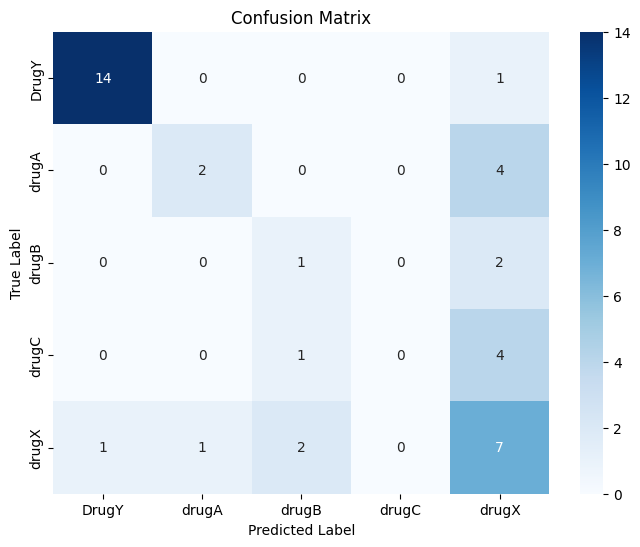

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get unique class names from y_test for labels
class_names = sorted(np.unique(y_test))

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()